In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\94777\AppData\Local\Temp\ipykernel_9980\3434512861.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('Data/Audio_Paths.csv')

In [3]:
features = {"Energy": [], "RMS Energy": [], "Duration": [], "Intensity": [], "Tempo": [], "Aggressiveness": []}

In [4]:
def extract_features(audio_file,emotion,sample_rate=22050):
    data,_ = librosa.load(audio_file, duration=3, offset=0.5, res_type='kaiser_fast')
    
    energy = np.sum(np.abs(data)**2)
    rms_energy = librosa.feature.rms(y=data)[0].mean()
    duration = librosa.get_duration(y=data, sr=sample_rate)
    intensity = np.max(np.abs(data))
    tempo, _ = librosa.beat.beat_track(y=data, sr=sample_rate)

    # Add features to dictionary
    features['Energy'].append(energy)
    features['RMS Energy'].append(rms_energy)
    features['Duration'].append(duration)
    features['Intensity'].append(intensity)
    features['Tempo'].append(tempo)
    features['Aggressiveness'].append(emotion)

In [5]:
for i in range(len(data)):
    path,emotion = data.iloc[i,0],data.iloc[i,1]
    extract_features(path,emotion)

In [7]:
data_frame = pd.DataFrame(features)
data_frame.head()

,Energy,RMS Energy,Duration,Intensity,Tempo,Aggressiveness
0,11.823792,0.008446,3.0,0.158349,129.199219,1
1,16.592800,0.009717,3.0,0.193986,103.359375,1
2,3.107532,0.004660,3.0,0.073526,129.199219,1
3,20.119280,0.011225,3.0,0.160906,151.999081,1
4,19.658274,0.011913,3.0,0.105626,95.703125,1


In [8]:
# Drop Duration column
data_frame.drop(columns=['Duration'], inplace=True)

In [9]:
# Get the row of highest Energy
data_frame[data_frame['Energy'] == data_frame['Energy'].max()]

,Energy,RMS Energy,Intensity,Tempo,Aggressiveness
2912,11436.521484,0.359019,1.03631,123.046875,1


In [10]:
# Get the row of highest Intensity
data_frame[data_frame['Intensity'] == data_frame['Intensity'].max()]

,Energy,RMS Energy,Intensity,Tempo,Aggressiveness
457,2980.590576,0.179617,1.2241,129.199219,1


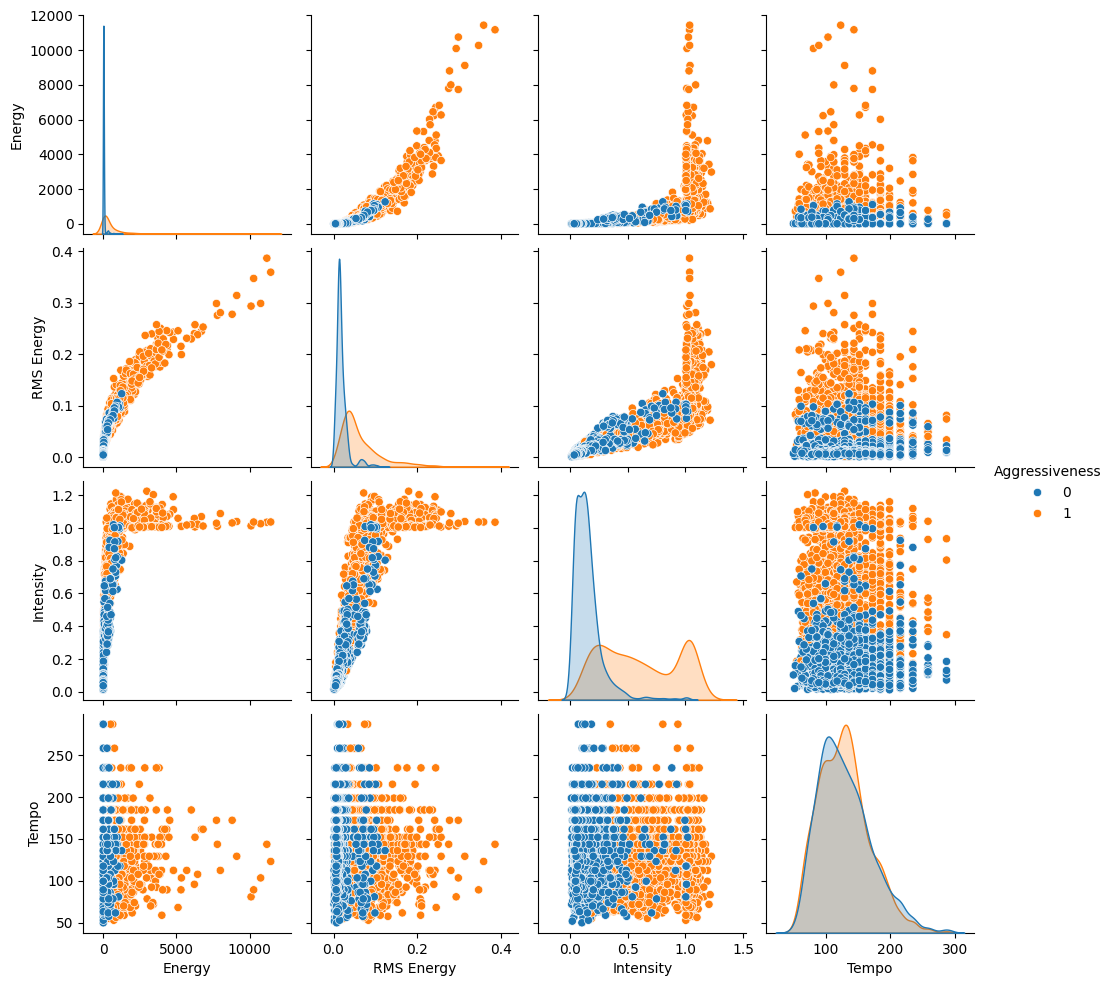

In [11]:
import seaborn as sns
sns.pairplot(data_frame, hue='Aggressiveness')
plt.show()